# Time Series Forecasting Fundamentals with TensorFlow + Milestone Project: BitPredict

Let's write some TensorFlow code to predict the price of Bitcoin based on historical price of Bitcoin.

## Importing time series with pandas

In [1]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('./bitcoin_price.csv',
                 parse_dates=['Date'],
                 index_col=['Date']) # parse the date column and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

We have collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can be thousands to tens of thousands to millions).

A smaller number of samples is something you will often run into with time series of ata problems.

**Note:** The **seasonality** of a time series dataset is referred as the nmber of samples per year. So for our Bitcoin data, it has seasonality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.

In [5]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


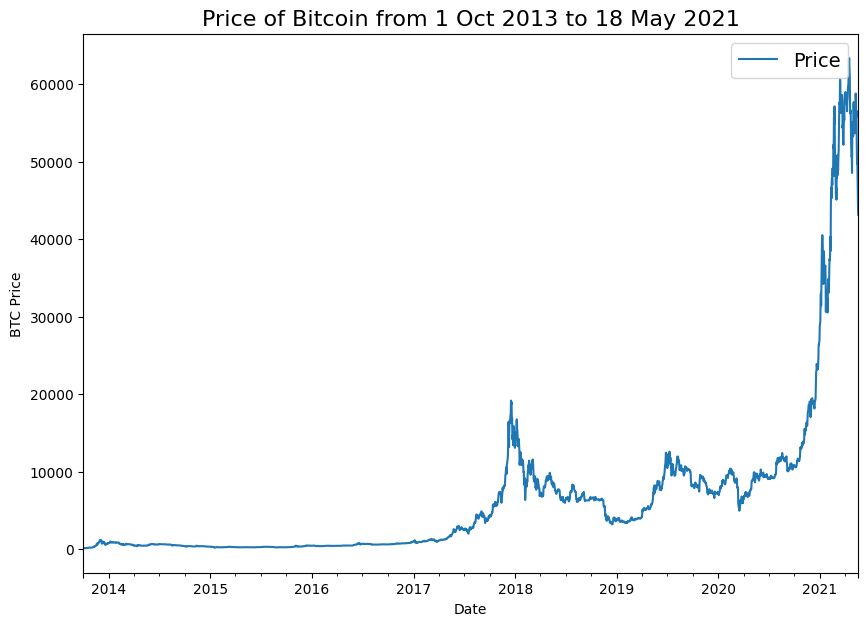

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14)
plt.show()

## Importing time series data with Pyhton's CSV module

In [7]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("bitcoin_price.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skip the header
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
        btc_price.append(float(line[2])) # get the bitcoin price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

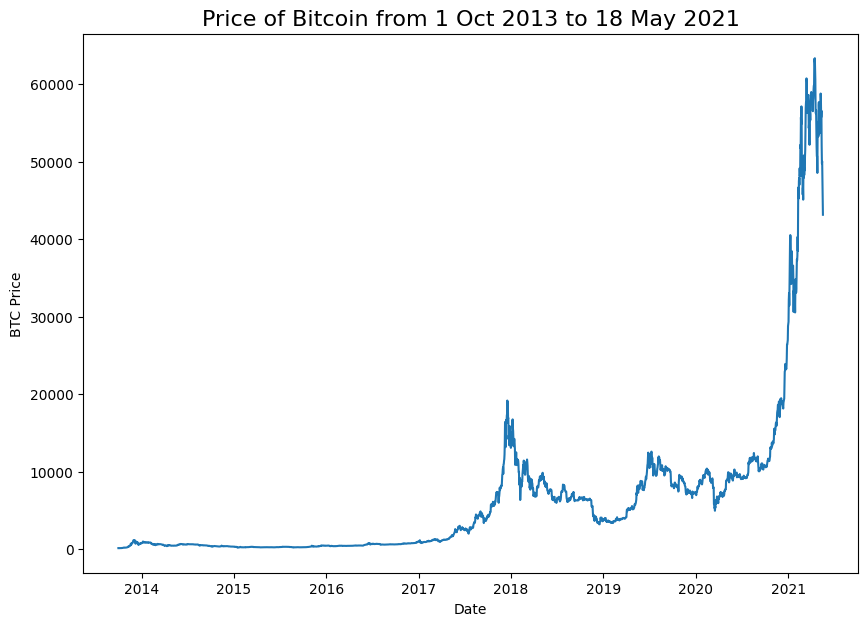

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.xlabel('Date')
plt.show()

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC price
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

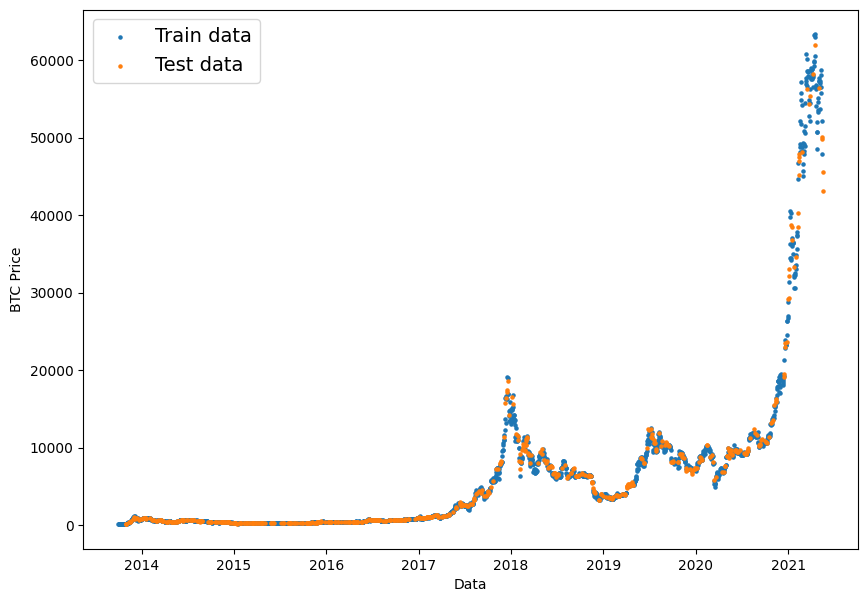

In [11]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

### Create train and test sets for time series (the right way)

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the splits)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

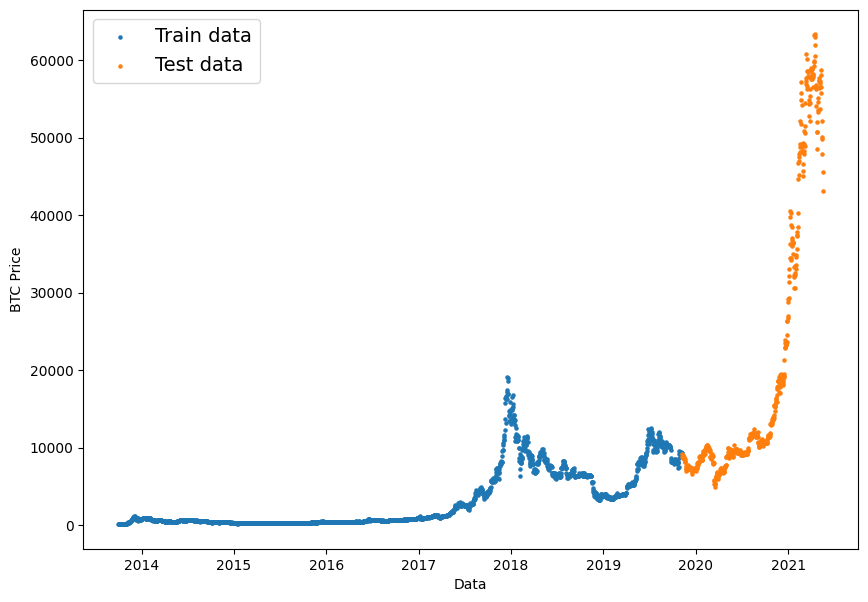

In [13]:
# Plto with the correctly splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters:
    -----------
    timesteps: array of timestep values
    values: array of values across time
    format: style of plot, default "."
    start: where to start the plot (setting a value will index from start of timesteps and values)
    end: where to end the plot
    label: label to show on plot about values
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

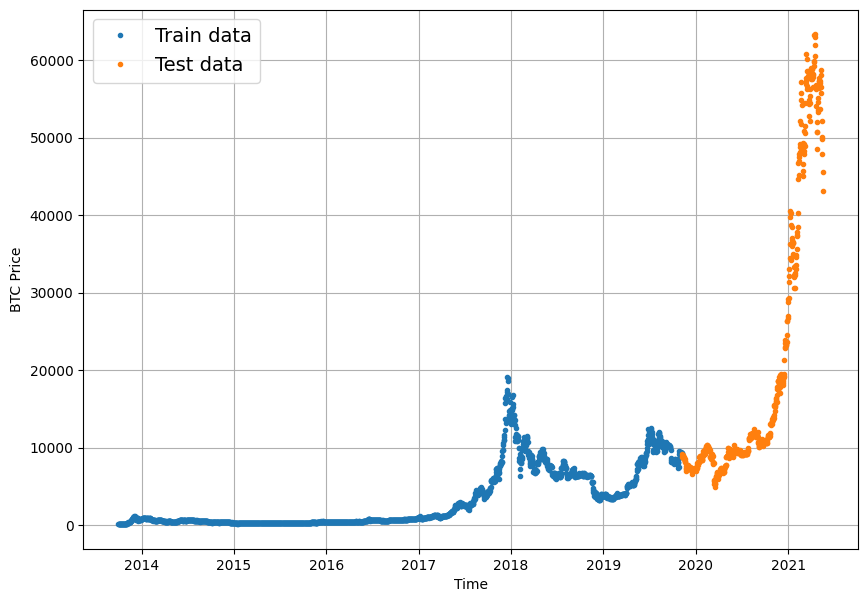

In [15]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We have got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we are going to predict
* **Window size** = number of timesteps we are going to use to predict **horizon**

Modelling experiments we are running:

1. Naïve model (baseline)
2. Dense Model, horizon = 1, window = 7
3. Dense Model, horizon = 1, window = 30
4. Dense Model, horizon = 7, window = 30
5. Conv1D
6. LSTM
7. Dense Model, horizon = 1, window = 7 (but with multivariate data)
8. N-BEATs Algorithm
9. Ensemble (multiple models optimized stacked together)
10. Future prediction model
11. Dense Model (but with turkey data introduced) 

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous step) - this is for horizon of 1.

In [16]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

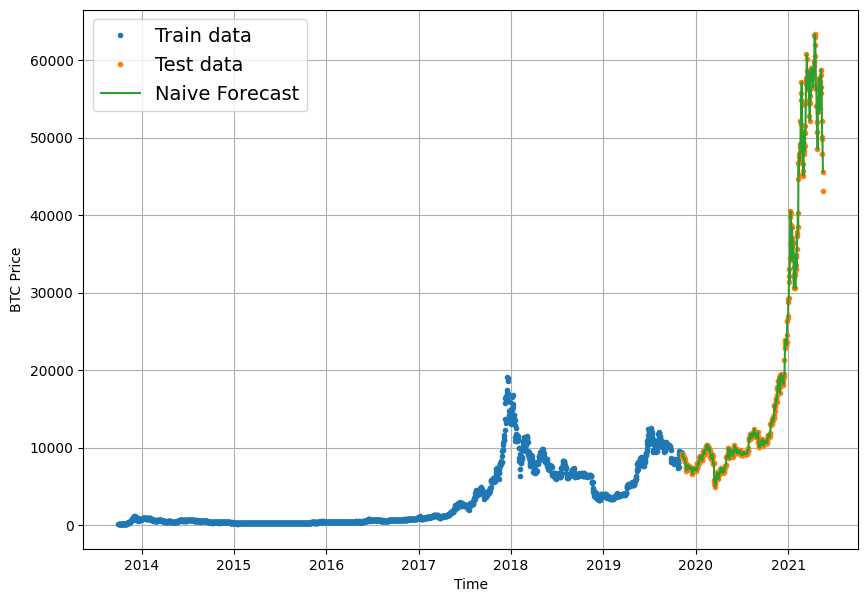

In [17]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing? We are predicting a number, so that means we have a form of a regression problem.

Because we are working on a regression problem, we will need some regression-like metrics.

A few common regression metrics which can also be used for time series forecasting:

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE - mean absolute percentage error
* MASE - mean absolute scaled error

For all the above metrics, **lower is better**.

The main thing we are evaluating here is: **how do our model's forecast (y_pred) compare against the actual values (y_true or ground truth values)?** 

In [18]:
import tensorflow as tf

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [21]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [22]:
# Let's now see if it works
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [23]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [24]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Others Models for Time Series Forecasting

In this notebook we are going to use only neural networks for time series forecasting, but there are a plenty of models used in the industry or as a baseline model you can use.

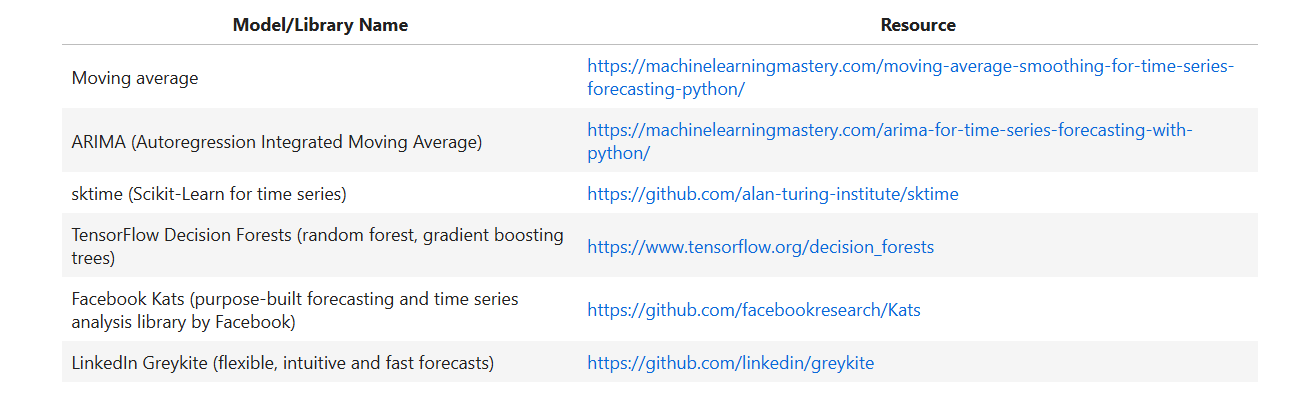

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] --> [7]
[1, 2, 3, 4, 5, 6, 7] --> [8]
[2, 3, 4, 5, 6, 7, 8] --> [9]
```

In [25]:
len(y_train)

2229

In [26]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [27]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [28]:
# Create function to label window data
def get_labelled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    E.g. if horizon = 1 --> Input: [0, 1, 2, 3, 4, 5, 6, 7] --> Output: ([0, 1, 2, 3, 4, 5, 6, 7], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [29]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We have got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we will leverage NumPy's array indexing.

Our function will:
1. Create a window step of specific window size.
2. It will numpy indexing to create a 2D array of multiple window steps, for example:
```
[
    [0, 1, 2, 3, 4, 5, 6],
    [1, 2, 3, 4, 5, 6, 7],
    [2, 3, 4, 5, 6, 7, 8]
]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series.
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with specified horizon.

In [30]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D into a 2D array of sequential labelled windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T # create 2D array of windows of size window_siz

    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [31]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
# View the first 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [33]:
# View the last 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}')

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets

In [34]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train an test splits.
    """
    splits_size = int(len(windows) * (1 - test_split)) # this will default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

In [36]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-6]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we are training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [37]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor='val_loss',
                                              verbose=0, # only output a limited amount of text
                                              save_best_only=True)

## Model 1: Dense Model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we have used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

In [38]:
import tensorflow as tf
from tensorflow.keras import layers # type: ignore

# Set random seed for as reporducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense') # name our model so we can save it

# 2. Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 5s 84ms/step - loss: 1078.1106 - mae: 1078.1106 - mse: 4371994.5000 - val_loss: 2947.3828 - val_mae: 2947.3828 - val_mse: 18611072.0000
Epoch 2/100
18/18 [==============================] - 1s 61ms/step - loss: 268.2770 - mae: 268.2770 - mse: 289301.5938 - val_loss: 955.7018 - val_mae: 955.7018 - val_mse: 2835958.5000
Epoch 3/100
18/18 [==============================] - 1s 54ms/step - loss: 170.6111 - mae: 170.6111 - mse: 150483.3125 - val_loss: 890.1728 - val_mae: 890.1728 - val_mse: 2540538.5000
Epoch 4/100
18/18 [==============================] - 1s 67ms/step - loss: 155.8270 - mae: 155.8270 - mse: 129477.9609 - val_loss: 829.6341 - val_mae: 829.6341 - val_mse: 2268265.0000
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 147.9121 - mae: 147.9121 - mse: 117958.4141 - val_loss: 861.0193 - val_mae: 861.0193 - val_mse: 2236632.7500
Epoch 6/100
18/18 [==============================] - 1s 51ms/step - loss: 142.8

In [39]:
# Evaluate model on test data (last performance - not the best)
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 580.7095 - mae: 580.7095 - mse: 1207232.7500


[580.70947265625, 580.70947265625, 1207232.75]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 574.7403 - mae: 574.7403 - mse: 1188002.7500


[574.7402954101562, 574.7402954101562, 1188002.75]

## Making forecasts with a model (on the test dataset)

To make 'forecasts' on the dataset (note: these won't be actual forecasts, they're only pseudo forecasts actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [41]:
def make_preds(model, input_data):
    """
    Uses model to make predictions input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [42]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(551,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8705.506 , 8681.034 , 8503.554 , 8452.63  , 8510.1045, 8263.829 ,
        8112.288 , 8055.868 , 7709.8433, 7313.3667], dtype=float32)>)

In [43]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 574.7403,
 'mse': 1188002.9,
 'rmse': 1089.9554,
 'mape': 2.5618834,
 'mase': 1.0031228}

In [44]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

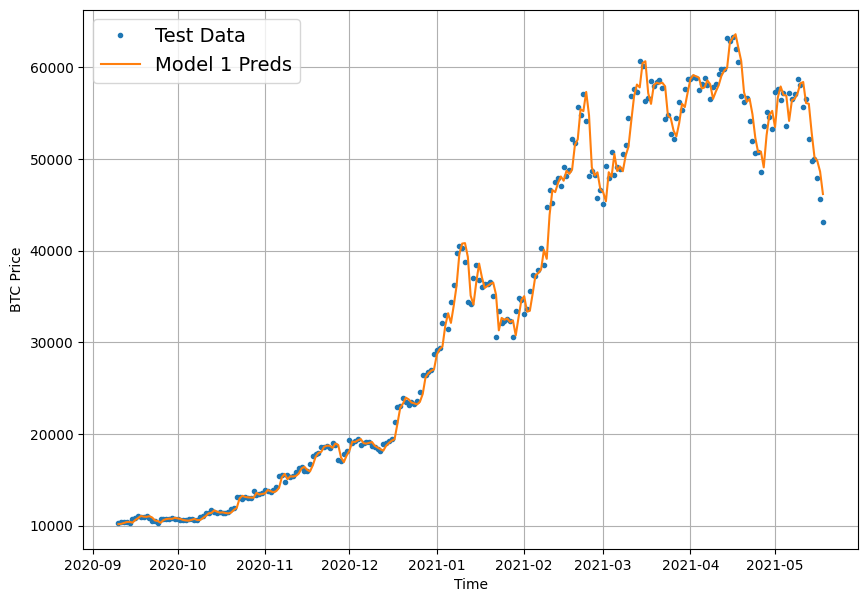

In [45]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format='-', label='Model 1 Preds')

## Model 2: Dense (window = 30, horizon = 1)

In [46]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [47]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [48]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [49]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

# Compile model
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [50]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 4ms/step - loss: 634.8851


634.8851318359375

In [51]:
# Load in the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 4ms/step - loss: 619.6102


619.6102294921875

In [52]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [53]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([528]), TensorShape([528]))

In [54]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 619.6102,
 'mse': 1301687.1,
 'rmse': 1140.915,
 'mape': 2.756586,
 'mase': 1.0487381}

In [55]:
model_1_results

{'mae': 574.7403,
 'mse': 1188002.9,
 'rmse': 1089.9554,
 'mape': 2.5618834,
 'mase': 1.0031228}

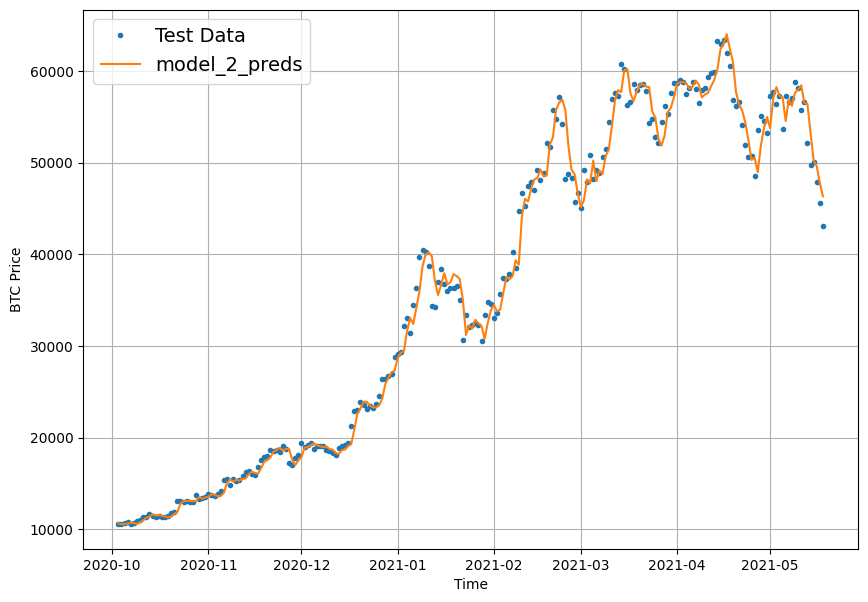

In [56]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format='-', label='model_2_preds')

## Model 3: Dense (window = 30, horizon = 7)



In [57]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [58]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 522, 2229, 522)

In [59]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

# Compile
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [60]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 6ms/step - loss: 1296.7920


1296.7919921875

In [61]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 4ms/step - loss: 1279.1266


1279.1265869140625

In [62]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds.shape

17/17 [==============================] - 0s 2ms/step


TensorShape([522, 7])

In [63]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([522, 7]), TensorShape([528]))

In [64]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  170.77547 ,   270.23502 ,   353.824   ,   296.6582  ,
          308.35547 ,   214.60295 ,   244.41985 ,   296.33008 ,
          221.73508 ,   214.68172 ,   240.35051 ,   464.83008 ,
           89.8065  ,    64.50488 ,    73.49958 ,    80.73668 ,
          104.14286 ,    86.62263 ,   148.45312 ,   116.88337 ,
          157.27881 ,    83.45961 ,   131.50426 ,   167.72775 ,
          159.76172 ,   249.27316 ,   381.60233 ,   543.58685 ,
          519.87897 ,   523.10187 ,   551.3784  ,   341.44107 ,
          206.79631 ,   242.42543 ,   331.7961  ,   391.70236 ,
          465.07666 ,   480.20346 ,   472.32108 ,   156.32938 ,
          201.96986 ,   328.26492 ,   412.39117 ,   586.0579  ,
          440.3496  ,   349.6893  ,   296.81152 ,   295.13937 ,
          395.45074 ,   527.8708  ,   700.621   ,   733.9259  ,
          581.9644  ,   355.6063  ,   121.77832 ,   165.2006  ,
          134.00266 ,   215.67522 ,   357.69644 ,   389.22684 ,
          575.3954  ,   415.50168

## Make our evaluation function work for larger horizons

In [65]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [66]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1279.1266,
 'mse': 5630458.0,
 'rmse': 1468.2236,
 'mape': 5.5300546,
 'mase': 2.1870415}

We have made and evaluated predictions with `model_3`, let's visualize visualize visualize!

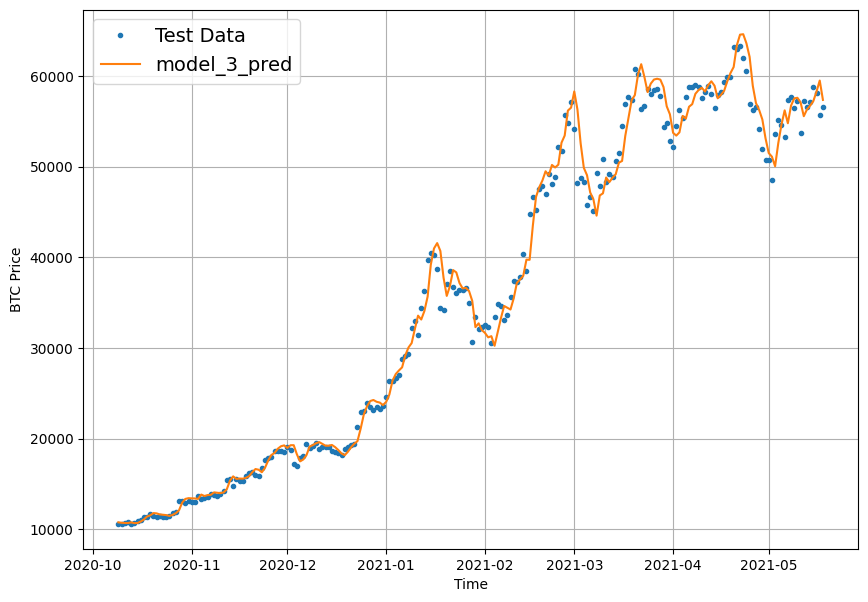

In [67]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format='-', start=offset, label='model_3_pred')

## Which of our models is performing the best so far?

So we have trained a few models, now let's compare them and see how they have gone...

<Axes: >

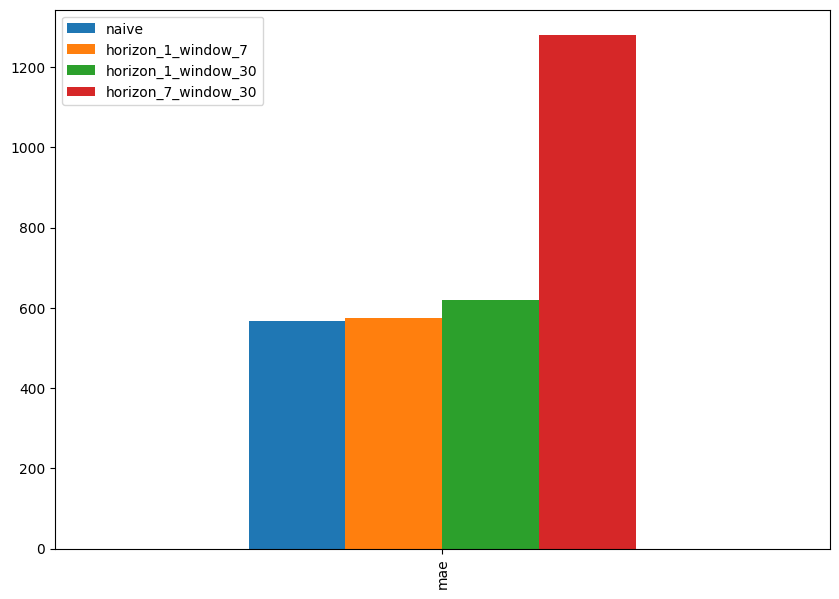

In [68]:
pd.DataFrame({'naive': naive_results['mae'],
              'horizon_1_window_7': model_1_results['mae'],
              'horizon_1_window_30': model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [69]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [70]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [71]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2229, 2229, 551, 551)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`... However, our data isn't in that shape yet.

In [72]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [73]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works 
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [74]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension to our layer

In [75]:
# Test out our lambda layer
print(f'Original shape: {x.shape}') # (WINDOW_SIZE)
print(f'Expanded shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [76]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1D')

# Compile model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [77]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 606.2174


606.2174072265625

In [79]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 580.0549


580.0548706054688

In [80]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8760.579, 8694.66 , 8532.897, 8487.464, 8520.76 ], dtype=float32)>

In [81]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 580.0549,
 'mse': 1209732.4,
 'rmse': 1099.8783,
 'mape': 2.5877762,
 'mase': 1.0123986}

In [82]:
model_1_results

{'mae': 574.7403,
 'mse': 1188002.9,
 'rmse': 1089.9554,
 'mape': 2.5618834,
 'mase': 1.0031228}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

In [83]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_LSTM')

# Compile
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2363.2395INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 6s 218ms/step - loss: 2353.2170 - val_loss: 9978.8613
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 794.4825INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 177ms/step - loss: 780.8487 - val_loss: 1423.7509
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 254.1721 - val_loss: 1427.5345
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 201.6899INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 174ms/step - loss: 195.8100 - val_loss: 1052.9501
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 187.5209INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 194ms/step - loss: 187.8471 - val_loss: 1038.0267
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 185.2354INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 201ms/step - loss: 185.2354 - val_loss: 1030.5146
Epoch 7/100
18/18 [==============================] - 0s 20ms/step - loss: 183.7704 - val_loss: 1051.7043
Epoch 8/100
18/18 [==============================] - 0s 16ms/step - loss: 181.1779 - val_loss: 1052.8646
Epoch 9/100
18/18 [==============================] - 0s 14ms/step - loss: 179.7665 - val_loss: 1075.9847
Epoch 10/100
18/18 [==============================] - 0s 16ms/step - loss: 179.2101 - val_loss: 1073.5948
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 178.8947INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 173ms/step - loss: 177.9902 - val_loss: 993.0792
Epoch 12/100
15/18 [========================>.....] - ETA: 0s - loss: 178.7952INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 182ms/step - loss: 176.8562 - val_loss: 984.8208
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 173.3674INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 182ms/step - loss: 173.3692 - val_loss: 979.2298
Epoch 14/100
18/18 [==============================] - 0s 20ms/step - loss: 172.0294 - val_loss: 988.4464
Epoch 15/100
18/18 [==============================] - 0s 17ms/step - loss: 170.0691 - val_loss: 982.2413
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 167.8233INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 204ms/step - loss: 168.2856 - val_loss: 959.0252
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 164.5813INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 183ms/step - loss: 165.4910 - val_loss: 924.8217
Epoch 18/100
18/18 [==============================] - 0s 20ms/step - loss: 165.2429 - val_loss: 938.0199
Epoch 19/100
18/18 [==============================] - 0s 19ms/step - loss: 161.7330 - val_loss: 975.8560
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 162.8283INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 179ms/step - loss: 162.7845 - val_loss: 899.9973
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 158.3717INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 179ms/step - loss: 161.2772 - val_loss: 883.3069
Epoch 22/100
18/18 [==============================] - 0s 17ms/step - loss: 157.0986 - val_loss: 955.0759
Epoch 23/100
18/18 [==============================] - 0s 18ms/step - loss: 157.3392 - val_loss: 951.1849
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 152.7212INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 199ms/step - loss: 153.5524 - val_loss: 868.2255
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 151.8271INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 178ms/step - loss: 151.9138 - val_loss: 844.4711
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 153.4843INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 173ms/step - loss: 148.6306 - val_loss: 837.6831
Epoch 27/100
18/18 [==============================] - 0s 20ms/step - loss: 147.7047 - val_loss: 905.6413
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 149.4968INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 178ms/step - loss: 147.6013 - val_loss: 820.1588
Epoch 29/100
18/18 [==============================] - 0s 20ms/step - loss: 143.8309 - val_loss: 841.2886
Epoch 30/100
18/18 [==============================] - 0s 18ms/step - loss: 141.2817 - val_loss: 829.5850
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 142.7965INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 194ms/step - loss: 140.9170 - val_loss: 784.4219
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 140.0253INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 179ms/step - loss: 140.0253 - val_loss: 769.2048
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 137.9684INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 177ms/step - loss: 138.4201 - val_loss: 768.9231
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 138.3120INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 180ms/step - loss: 139.4247 - val_loss: 749.9172
Epoch 35/100
18/18 [==============================] - 0s 16ms/step - loss: 135.0596 - val_loss: 755.0364
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 133.6353INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 199ms/step - loss: 133.0611 - val_loss: 739.3204
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 130.3801INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 185ms/step - loss: 130.5853 - val_loss: 733.6887
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 130.3719INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 179ms/step - loss: 130.3719 - val_loss: 730.8275
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 131.8271INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 181ms/step - loss: 129.1285 - val_loss: 716.9666
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 126.9152INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 195ms/step - loss: 127.7870 - val_loss: 700.0472
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 129.9295INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 181ms/step - loss: 128.5414 - val_loss: 697.4109
Epoch 42/100
18/18 [==============================] - 0s 19ms/step - loss: 124.9796 - val_loss: 721.7646
Epoch 43/100
18/18 [==============================] - 0s 16ms/step - loss: 127.3077 - val_loss: 705.0413
Epoch 44/100
18/18 [==============================] - 0s 18ms/step - loss: 124.2187 - val_loss: 724.3934
Epoch 45/100
18/18 [==============================] - 0s 16ms/step - loss: 122.2544 - val_loss: 697.8249
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 122.1855INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 176ms/step - loss: 121.2508 - val_loss: 665.9257
Epoch 47/100
18/18 [==============================] - ETA: 0s - loss: 119.9143INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 177ms/step - loss: 119.9143 - val_loss: 658.3815
Epoch 48/100
18/18 [==============================] - 0s 17ms/step - loss: 119.7999 - val_loss: 714.4982
Epoch 49/100
18/18 [==============================] - 0s 17ms/step - loss: 120.2195 - val_loss: 667.9547
Epoch 50/100
18/18 [==============================] - 0s 15ms/step - loss: 120.4110 - val_loss: 682.1719
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 123.3259INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 181ms/step - loss: 123.4460 - val_loss: 652.6201
Epoch 52/100
18/18 [==============================] - 0s 16ms/step - loss: 124.8733 - val_loss: 780.7615
Epoch 53/100
18/18 [==============================] - 0s 19ms/step - loss: 129.6599 - val_loss: 677.5961
Epoch 54/100
18/18 [==============================] - 0s 20ms/step - loss: 122.9248 - val_loss: 673.5544
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 127.2473INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 204ms/step - loss: 128.4583 - val_loss: 643.7278
Epoch 56/100
15/18 [========================>.....] - ETA: 0s - loss: 115.2614INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 174ms/step - loss: 116.0954 - val_loss: 630.0506
Epoch 57/100
14/18 [======================>.......] - ETA: 0s - loss: 117.7600INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 178ms/step - loss: 118.2181 - val_loss: 627.7542
Epoch 58/100
18/18 [==============================] - 0s 21ms/step - loss: 117.6585 - val_loss: 640.9935
Epoch 59/100
18/18 [==============================] - 0s 17ms/step - loss: 118.0910 - val_loss: 628.3494
Epoch 60/100
16/18 [=========================>....] - ETA: 0s - loss: 113.7030INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 178ms/step - loss: 116.1590 - val_loss: 617.3557
Epoch 61/100
18/18 [==============================] - 0s 17ms/step - loss: 116.2255 - val_loss: 619.2275
Epoch 62/100
18/18 [==============================] - 0s 16ms/step - loss: 118.5725 - val_loss: 633.4217
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 114.6399INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 206ms/step - loss: 114.6399 - val_loss: 612.6099
Epoch 64/100
18/18 [==============================] - 0s 18ms/step - loss: 115.6224 - val_loss: 623.1411
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 115.9229INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 178ms/step - loss: 114.4983 - val_loss: 610.9725
Epoch 66/100
15/18 [========================>.....] - ETA: 0s - loss: 112.6854INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 179ms/step - loss: 112.8983 - val_loss: 610.8202
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 107.7694INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 204ms/step - loss: 113.6906 - val_loss: 610.7535
Epoch 68/100
18/18 [==============================] - 0s 16ms/step - loss: 113.8229 - val_loss: 614.9684
Epoch 69/100
18/18 [==============================] - 0s 19ms/step - loss: 112.2312 - val_loss: 612.7652
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 114.2972INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 143ms/step - loss: 113.5774 - val_loss: 610.2594
Epoch 71/100
14/18 [======================>.......] - ETA: 0s - loss: 114.1998INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 183ms/step - loss: 112.2212 - val_loss: 608.9881
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 114.1380INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 178ms/step - loss: 112.7837 - val_loss: 599.8865
Epoch 73/100
18/18 [==============================] - 0s 16ms/step - loss: 116.1698 - val_loss: 608.3500
Epoch 74/100
18/18 [==============================] - 0s 19ms/step - loss: 112.7129 - val_loss: 601.3339
Epoch 75/100
14/18 [======================>.......] - ETA: 0s - loss: 117.5618INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 210ms/step - loss: 112.1151 - val_loss: 595.9929
Epoch 76/100
18/18 [==============================] - 0s 17ms/step - loss: 112.2107 - val_loss: 606.0887
Epoch 77/100
18/18 [==============================] - 0s 16ms/step - loss: 111.2461 - val_loss: 599.5865
Epoch 78/100
16/18 [=========================>....] - ETA: 0s - loss: 114.6324INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 172ms/step - loss: 113.0933 - val_loss: 593.9587
Epoch 79/100
18/18 [==============================] - 0s 16ms/step - loss: 111.4452 - val_loss: 614.8777
Epoch 80/100
18/18 [==============================] - 0s 19ms/step - loss: 116.0656 - val_loss: 643.4434
Epoch 81/100
18/18 [==============================] - 0s 17ms/step - loss: 118.1089 - val_loss: 675.4789
Epoch 82/100
18/18 [==============================] - 0s 20ms/step - loss: 115.0878 - val_loss: 613.9156
Epoch 83/100
18/18 [==============================] - 0s 20ms/step - loss: 112.3885 - val_loss: 600.7984
Epoch 84/100
18/18 [==============================] - 0s 19ms/step - loss: 111.6513 - val_loss: 605.2372
Epoch 85/100
18/18 [==============================] - 0s 19ms/step - loss: 111.3167 - val_loss: 610.4017
Epoch 86/100
16/18 [=========================>....] - ETA: 0s - loss: 111.3969INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 145ms/step - loss: 113.1985 - val_loss: 589.3297
Epoch 87/100
18/18 [==============================] - 0s 18ms/step - loss: 113.7798 - val_loss: 637.1178
Epoch 88/100
18/18 [==============================] - 0s 16ms/step - loss: 111.5142 - val_loss: 601.6480
Epoch 89/100
18/18 [==============================] - 0s 15ms/step - loss: 111.9658 - val_loss: 666.4091
Epoch 90/100
18/18 [==============================] - 0s 17ms/step - loss: 114.9246 - val_loss: 600.3305
Epoch 91/100
18/18 [==============================] - 0s 17ms/step - loss: 112.2130 - val_loss: 613.6273
Epoch 92/100
18/18 [==============================] - 0s 16ms/step - loss: 110.5237 - val_loss: 614.8899
Epoch 93/100
18/18 [==============================] - 0s 16ms/step - loss: 112.2791 - val_loss: 603.7563
Epoch 94/100
18/18 [==============================] - 0s 20ms/step - loss: 111.5849 - val_loss: 621.8508
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - los

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 176ms/step - loss: 117.0715 - val_loss: 587.5286
Epoch 96/100
15/18 [========================>.....] - ETA: 0s - loss: 111.6495INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 185ms/step - loss: 111.4090 - val_loss: 583.2150
Epoch 97/100
18/18 [==============================] - 0s 19ms/step - loss: 110.1846 - val_loss: 597.5945
Epoch 98/100
18/18 [==============================] - 0s 19ms/step - loss: 110.2399 - val_loss: 629.7456
Epoch 99/100
18/18 [==============================] - 0s 17ms/step - loss: 110.5816 - val_loss: 592.2360
Epoch 100/100
18/18 [==============================] - 0s 15ms/step - loss: 110.2001 - val_loss: 671.4951


In [84]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 583.2150


583.2149658203125

In [85]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 5ms/step


In [86]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

In [87]:
model_5_results

{'mae': 583.21497,
 'mse': 1216523.5,
 'rmse': 1102.9612,
 'mape': 2.6081018,
 'mase': 1.0179142}

In [88]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results.

## Make a multivariate time series dataset

Before we add feature to our time series, what is a feature we can use?

One feature we could add is whether or not Elon Musk tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events...

In [89]:
# Let's make a multivariate time series dataset
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [90]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [91]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [92]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

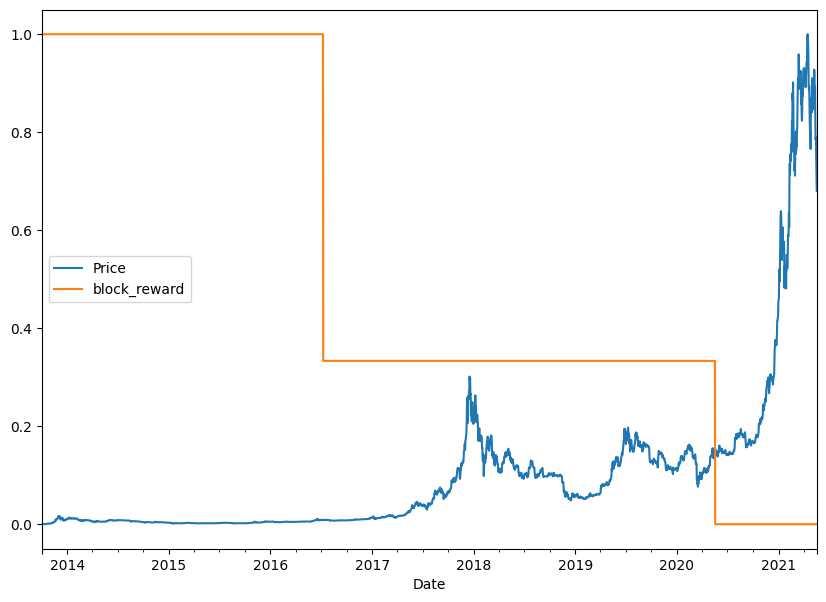

In [93]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a window dataset with pandas

Previously, we have turned our univariate time series into windowed dataset using the helper functions above.

However, since we have got multivariate data, these functions won't work.

Not to worry, we can use the ``pandas.DataFrame.shift()`` method to window our multivariate data.

In [94]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [95]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [96]:
# Create X (windows) and Y (horizons) features
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [97]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [98]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

## Model 6: Dense (multivariate time series)

In [99]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

# Compile
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())
# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1081.9404INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 86ms/step - loss: 1063.1427 - val_loss: 2250.3718
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 292.2192INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 73ms/step - loss: 267.1121 - val_loss: 1529.2604
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 189.3062INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 71ms/step - loss: 187.2692 - val_loss: 913.6190
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 159.0683INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 71ms/step - loss: 158.5319 - val_loss: 837.2911
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 150.3372INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 74ms/step - loss: 144.0149 - val_loss: 756.1848
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 131.6804INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 74ms/step - loss: 131.6804 - val_loss: 694.0518
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 125.8546 - val_loss: 806.0066
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 124.6409INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 124.5272 - val_loss: 639.3010
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 120.4427 - val_loss: 830.4634
Epoch 10/100
18/18 [==============================] - 0s 11ms/step - loss: 146.3700 - val_loss: 898.4483
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 131.6702 - val_loss: 987.4445
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 143.8803 - val_loss: 647.1688
Epoch 13/100
18/18 [==============================] - 0s 9ms/step - loss: 128.2528 - val_loss: 666.1536
Epoch 14/100
 9/18 [==============>...............] - ETA: 0s - loss: 120.5349INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 73ms/step - loss: 120.0430 - val_loss: 624.1850
Epoch 15/100
18/18 [==============================] - 0s 12ms/step - loss: 121.7233 - val_loss: 635.0311
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 113.9415INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 75ms/step - loss: 113.9415 - val_loss: 611.2146
Epoch 17/100
18/18 [==============================] - 0s 11ms/step - loss: 114.7823 - val_loss: 619.7835
Epoch 18/100
18/18 [==============================] - 0s 11ms/step - loss: 125.9551 - val_loss: 688.5208
Epoch 19/100
18/18 [==============================] - 0s 12ms/step - loss: 116.8741 - val_loss: 612.2800
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 112.3032INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 92ms/step - loss: 113.1891 - val_loss: 588.8643
Epoch 21/100
18/18 [==============================] - 0s 11ms/step - loss: 112.2108 - val_loss: 611.6594
Epoch 22/100
18/18 [==============================] - 0s 11ms/step - loss: 112.8928 - val_loss: 590.4236
Epoch 23/100
18/18 [==============================] - 0s 11ms/step - loss: 116.9825 - val_loss: 616.5699
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 113.9036INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 77ms/step - loss: 113.9036 - val_loss: 582.8904
Epoch 25/100
18/18 [==============================] - 0s 12ms/step - loss: 108.2482 - val_loss: 598.3898
Epoch 26/100
18/18 [==============================] - 0s 12ms/step - loss: 109.2616 - val_loss: 588.8163
Epoch 27/100
18/18 [==============================] - 0s 11ms/step - loss: 107.9494 - val_loss: 593.1508
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 108.8204INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 77ms/step - loss: 108.4949 - val_loss: 581.2281
Epoch 29/100
18/18 [==============================] - 0s 10ms/step - loss: 106.5256 - val_loss: 600.1125
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1499 - val_loss: 666.4466
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1872INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 67ms/step - loss: 117.7746 - val_loss: 577.7484
Epoch 32/100
 9/18 [==============>...............] - ETA: 0s - loss: 111.7127INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 69ms/step - loss: 108.4041 - val_loss: 576.2807
Epoch 33/100
18/18 [==============================] - 0s 9ms/step - loss: 108.1151 - val_loss: 586.6290
Epoch 34/100
18/18 [==============================] - 0s 9ms/step - loss: 108.2020 - val_loss: 749.3000
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 113.0428 - val_loss: 676.6415
Epoch 36/100
18/18 [==============================] - 0s 9ms/step - loss: 111.7978 - val_loss: 667.0977
Epoch 37/100
18/18 [==============================] - 0s 10ms/step - loss: 123.0013 - val_loss: 589.2368
Epoch 38/100
18/18 [==============================] - 0s 9ms/step - loss: 109.9239 - val_loss: 614.0624
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 116.5954 - val_loss: 632.4178
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 111.4555INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 104ms/step - loss: 110.6504 - val_loss: 571.8644
Epoch 41/100
18/18 [==============================] - 0s 13ms/step - loss: 108.9166 - val_loss: 615.5186
Epoch 42/100
18/18 [==============================] - 0s 13ms/step - loss: 110.5796 - val_loss: 574.1542
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 113.8581 - val_loss: 663.8368
Epoch 44/100
18/18 [==============================] - 0s 13ms/step - loss: 119.0275 - val_loss: 601.0172
Epoch 45/100
18/18 [==============================] - 0s 16ms/step - loss: 114.9528 - val_loss: 634.5798
Epoch 46/100
18/18 [==============================] - 0s 17ms/step - loss: 117.9585 - val_loss: 608.0122
Epoch 47/100
18/18 [==============================] - 0s 12ms/step - loss: 115.6078 - val_loss: 646.7017
Epoch 48/100
18/18 [==============================] - 0s 11ms/step - loss: 107.0689 - val_loss: 573.6922
Epoch 49/100
18/18 [==============================] - 0s 12ms/step 

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 80ms/step - loss: 104.6948 - val_loss: 571.4966
Epoch 60/100
18/18 [==============================] - 0s 12ms/step - loss: 105.7699 - val_loss: 594.8399
Epoch 61/100
18/18 [==============================] - 0s 12ms/step - loss: 112.7991 - val_loss: 585.0884
Epoch 62/100
18/18 [==============================] - 0s 12ms/step - loss: 105.8211 - val_loss: 596.8423
Epoch 63/100
18/18 [==============================] - 0s 12ms/step - loss: 106.1464 - val_loss: 602.5328
Epoch 64/100
18/18 [==============================] - 0s 11ms/step - loss: 109.4038 - val_loss: 667.8193
Epoch 65/100
18/18 [==============================] - 0s 14ms/step - loss: 110.2003 - val_loss: 672.9788
Epoch 66/100
18/18 [==============================] - 0s 12ms/step - loss: 109.6428 - val_loss: 572.5742
Epoch 67/100
18/18 [==============================] - 0s 13ms/step - loss: 110.0104 - val_loss: 648.6059
Epoch 68/100
18/18 [==============================] - 0s 12ms/step -

In [100]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 6ms/step - loss: 577.3615


577.3614501953125

In [101]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 571.4774


571.4774169921875

In [102]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8808.877, 8748.863, 9019.877, 8725.32 , 8712.388, 8738.797,
       8645.153, 8507.276, 8433.166, 8512.26 ], dtype=float32)>

In [103]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 571.4774,
 'mse': 1174012.8,
 'rmse': 1083.5187,
 'mape': 2.586357,
 'mase': 1.0039276}

In [104]:
model_1_results

{'mae': 574.7403,
 'mse': 1188002.9,
 'rmse': 1089.9554,
 'mape': 2.5618834,
 'mase': 1.0031228}

In [105]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we have built so far.

More specifically, we are going to be replicating the algorithm in the following paper: https://arxiv.org/pdf/1905.10437

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we have got to create it.

To create custom layers

In [106]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):

    def __init__(self,
                 input_size: int,
                 theta_size:int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers wach has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
        return backcast, forecast

Let's test our NBeatsBlock class.

To do this we will make some dummy inputs and outputs.

In [107]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [108]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [109]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f'Backcast: {tf.squeeze(backcast.numpy())}')
print(f'Forecast: {tf.squeeze(forecast.numpy())}')

Backcast: [ 0.05870431 -0.18966693 -0.01256808  0.00917907  0.02672067 -0.36318147
 -0.22457974]
Forecast: 0.3092181086540222


### Preparing data for N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we are going to be adhering to the performant data pipeline steps.

In [110]:
HORIZON = 1
WINDOW_SIZE = 7

In [111]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [112]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [113]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [114]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
 
train_dataset, test_dataset 

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few nunmber of parameters.

In [115]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (substract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture.

In [117]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Substract
substracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f'Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}')
print(f'Substracted tensors: {substracted.numpy()}')
print(f'Added tensor: {added.numpy()}')

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Substracted tensors: [10 10 10 10 10 10 10 10 10 10]
Added tensor: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this will be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we will be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create block which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we will use MAE to keep it inline with our models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we will use a couple of callbacks:
    * Early Stopping - because the model will be training for so long, we will stop it early if it stops improving
    * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [122]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                    theta_size=THETA_SIZE,
                                    horizon=HORIZON,
                                    n_neurons=N_NEURONS,
                                    n_layers=N_LAYERS,
                                    name='InitialBlock')

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

    # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f'NBetasBlock_{i}'
    )(residuals) # pass in the residuals

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
    forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBEATS')

# 8. Compile model with MAE loss
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])


Epoch 898: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 998: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: total: 2min 36s
Wall time: 2min 31s


In [123]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 95ms/step - loss: 574.6303


574.6303100585938

In [124]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 794ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8853.743 , 8766.348 , 9005.944 , 8774.86  , 8718.355 , 8714.1455,
       8659.737 , 8512.341 , 8441.083 , 8503.058 ], dtype=float32)>

In [126]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 574.6303,
 'mse': 1180644.4,
 'rmse': 1086.5746,
 'mape': 2.6114616,
 'mase': 1.0094663}

In [127]:
model_1_results

{'mae': 574.7403,
 'mse': 1188002.9,
 'rmse': 1089.9554,
 'mape': 2.5618834,
 'mase': 1.0031228}

In [128]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}